In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['target'] = bc.target
df.head() # Ver los datos para tener una idea de lo que contiene el dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
bc.target_names # Ver la clase de datos para la columna de target

array(['malignant', 'benign'], dtype='<U9')

In [4]:
# Ponemos 0 para benigno y 1 para maligno
df['target'].replace('Benign', 0, inplace=True)
df['target'].replace('Malignant', 1, inplace=True)

In [5]:
df.isna().sum() # Verificar si hay datos nulos en alguna de las features

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


### Ahora que ya confirmé que no hay valores nulos en los datos, y que ya tengo la variable target en términos de 0 (para benigno) y 1 (para maligno), entonces puedo proceder a entrenar modelos. En este caso decidí que entrenaré 6 modelos: regresión logística, árboles de decisión, random forest, KNN, SVC, y Gaussian Naive Bayes. Luego de esto, evaluaré cuál de todos tiene el mejor desempeño y ese será el que voy a elegir para usar GridSearch para implementarle los mejores hiperparámetros y evaluar su rendimiento para finalmente hacer algunas predicciones con ese modelo.

# Modelo de regresión logística

In [8]:
from sklearn.model_selection import train_test_split # Esto para dividir los datos en train y test
X = df.drop('target', axis=1) # Definir X
y = df['target'] # Definir y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Dividir los datos (80% train y 20% test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rlog = LogisticRegression()
rlog.fit(X_train, y_train)
y_pred = rlog.predict(X_test)

## Evaluación del modelo de regresión logística

In [13]:
# Métricas
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, mean_squared_error as mse
acc_log = accuracy_score(y_test, y_pred)
print('Exactitud:', accuracy_score(y_test, y_pred))
pre_log = precision_score(y_test, y_pred)
print('Precisión:', precision_score(y_test, y_pred))
rec_log = recall_score(y_test, y_pred)
print('Recall:', recall_score(y_test, y_pred))
f1_log = f1_score(y_test, y_pred)
print('Score de F1:', f1_score(y_test, y_pred))
r2_log = r2_score(y_test, y_pred)
print('Score de r2:', r2_score(y_test, y_pred))
mse_log = mse(y_test, y_pred)
print('Error cuadrado medio (MSE):', mse(y_test, y_pred))

Exactitud: 0.9473684210526315
Precisión: 0.9692307692307692
Recall: 0.9402985074626866
Score de F1: 0.9545454545454546
Score de r2: 0.7827881867259447
Error cuadrado medio (MSE): 0.05263157894736842


In [14]:
# Matriz de confusión                       # Matriz:
mat = confusion_matrix(y_test, y_pred)      # [V positivos, F positivos]
print(mat)                                  # [F negativos, V negativos]

[[45  2]
 [ 4 63]]


In [15]:
# Reporte de métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        47
           1       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# Modelo de árboles de decisión

In [16]:
from sklearn.tree import DecisionTreeClassifier
arb = DecisionTreeClassifier()
arb.fit(X_train, y_train)
y_pred = arb.predict(X_test)

## Evaluación del modelo de árboles de decisión

In [17]:
# Métricas
acc_arb = accuracy_score(y_test, y_pred)
print('Exactitud:', acc_arb)
pre_arb = precision_score(y_test, y_pred)
print('Precisión:', pre_arb)
rec_arb = recall_score(y_test, y_pred)
print('Recall:', rec_arb)
f1_arb = f1_score(y_test, y_pred)
print('Score de F1:', f1_arb)
r2_arb = r2_score(y_test, y_pred)
print('Score de r2:', r2_arb)
mse_arb = mse(y_test, y_pred)
print('Error cuadrado medio (MSE):', mse_arb)

Exactitud: 0.9122807017543859
Precisión: 0.9523809523809523
Recall: 0.8955223880597015
Score de F1: 0.9230769230769231
Score de r2: 0.6379803112099078
Error cuadrado medio (MSE): 0.08771929824561403


In [18]:
# Matriz de confusión
mat_arb = confusion_matrix(y_test, y_pred)
print(mat_arb)

[[44  3]
 [ 7 60]]


In [19]:
# Reporte de métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



# Modelo de Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Evaluación del modelo de Random Forest

In [21]:
# Métricas
acc_rf = accuracy_score(y_test, y_pred)
print('Exactitud:', acc_rf)
pre_rf = precision_score(y_test, y_pred)
print('Precisión:', pre_rf)
rec_rf = recall_score(y_test, y_pred)
print('Recall:', rec_rf)
f1_rf = f1_score(y_test, y_pred)
print('Score de F1:', f1_rf)
r2_rf = r2_score(y_test, y_pred)
print('Score de r2:', r2_rf)
mse_rf = mse(y_test, y_pred)
print('Error cuadrado medio (MSE):', mse_rf)

Exactitud: 0.956140350877193
Precisión: 0.9696969696969697
Recall: 0.9552238805970149
Score de F1: 0.9624060150375939
Score de r2: 0.8189901556049539
Error cuadrado medio (MSE): 0.043859649122807015


In [22]:
# Matriz de confusión
mat_rf = confusion_matrix(y_test, y_pred)
print(mat_rf)

[[45  2]
 [ 3 64]]


In [23]:
# Reporte de métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Modelo de KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## Evaluación del modelo de KNN

In [25]:
# Métricas
knn_acc = accuracy_score(y_test, y_pred)
print('Exactitud:', knn_acc)
knn_pre = precision_score(y_test, y_pred)
print('Precisión:', knn_pre)
knn_rec = recall_score(y_test, y_pred)
print('Recall:', knn_rec)
knn_f1 = f1_score(y_test, y_pred)
print('Score de F1:', knn_f1)
knn_r2 = r2_score(y_test, y_pred)
print('Score de r2:', knn_r2)
knn_mse = mse(y_test, y_pred)
print('Error cuadrado medio (MSE):', knn_mse)

Exactitud: 0.9385964912280702
Precisión: 0.9545454545454546
Recall: 0.9402985074626866
Score de F1: 0.9473684210526315
Score de r2: 0.7465862178469356
Error cuadrado medio (MSE): 0.06140350877192982


In [26]:
# Matriz de confusión
mat_knn = confusion_matrix(y_test, y_pred)
print(mat_knn)

[[44  3]
 [ 4 63]]


In [27]:
# Reporte de métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.95      0.94      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



# Modelo de SVC

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

## Evaluación del modelo de SVM

In [29]:
# Métricas
acc_svc = accuracy_score(y_test, y_pred)
print('Exactitud:', acc_svc)
pre_svc = precision_score(y_test, y_pred)
print('Precisión:', pre_svc)
rec_svc = recall_score(y_test, y_pred)
print('Recall:', rec_svc)
f1_svc = f1_score(y_test, y_pred)
print('Score de F1:', f1_svc)
r2_svc = r2_score(y_test, y_pred)
print('Score de r2:', r2_svc)
mse_svc = mse(y_test, y_pred)
print('Error cuadrado medio (MSE):', mse_svc)

Exactitud: 0.9298245614035088
Precisión: 0.9041095890410958
Recall: 0.9850746268656716
Score de F1: 0.9428571428571428
Score de r2: 0.7103842489679263
Error cuadrado medio (MSE): 0.07017543859649122


In [30]:
# Matriz de confusión
mat_svc = confusion_matrix(y_test, y_pred)
print(mat_svc)

[[40  7]
 [ 1 66]]


In [31]:
# Reporte de métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



# Modelo de Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
naive_bay = GaussianNB()
naive_bay.fit(X_train, y_train)
y_pred = naive_bay.predict(X_test)

## Evaluación del modelo de Gaussian NB

In [33]:
# Métricas
acc_bayes = accuracy_score(y_test, y_pred)
print('Exactitud:', acc_bayes)
pre_bayes = precision_score(y_test, y_pred)
print('Precisión:', pre_bayes)
rec_bayes = recall_score(y_test, y_pred)
print('Recall:', rec_bayes)
f1_bayes = f1_score(y_test, y_pred)
print('Score de F1:', f1_bayes)
r2_bayes = r2_score(y_test, y_pred)
print('Score de r2:', r2_bayes)
mse_bayes = mse(y_test, y_pred)
print('Error cuadrado medio (MSE):', mse_bayes)

Exactitud: 0.9298245614035088
Precisión: 0.9402985074626866
Recall: 0.9402985074626866
Score de F1: 0.9402985074626866
Score de r2: 0.7103842489679263
Error cuadrado medio (MSE): 0.07017543859649122


In [34]:
# Matriz de confusión
mat_bayes = confusion_matrix(y_test, y_pred)
print(mat_bayes)

[[43  4]
 [ 4 63]]


In [35]:
# Reporte de métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [38]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

### Ahora que ya entrené los 6 modelos, decidiré cuál tuvo mejor rendimiento para elegir el modelo final, en el cual usaré Grid Search para encontrar los mejores hiperparámetros de dicho modelo e implementarlo de esta forma para finalmente evaluar su rendimiento y hacer predicciones con este.

In [37]:
# Tabla de resumen de las métricas de todos los modelos (aquí es donde tomaré la decisión sobre con cuál modelo proceder)
from prettytable import PrettyTable
# Crear tabla
resumen = PrettyTable()

# Columnas
resumen.field_names = ["Modelo", "Exactitud", "Precisión", "Recall", "Score F1", "Score r2", "MSE"]

# Agregar filas
resumen.add_row(["Regresión logística", acc_log, pre_log, rec_log, f1_log, r2_log, mse_log])
resumen.add_row(["Árboles de decisión", acc_arb, pre_arb, rec_arb, f1_arb, r2_arb, mse_arb])
resumen.add_row(["Random Forest", acc_rf, pre_rf, rec_rf, f1_rf, r2_rf, mse_rf])
resumen.add_row(["KNN", knn_acc, knn_pre, knn_rec, knn_f1, knn_r2, knn_mse])
resumen.add_row(["SVC", acc_svc, pre_svc, rec_svc, f1_svc, r2_svc, mse_svc])
resumen.add_row(["Gaussian Naive Bayes", acc_bayes, pre_bayes, rec_bayes, f1_bayes, r2_bayes, mse_bayes])
print(resumen)

+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+
|        Modelo        |     Exactitud      |     Precisión      |       Recall       |      Score F1      |      Score r2      |         MSE          |
+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+
| Regresión logística  | 0.9473684210526315 | 0.9692307692307692 | 0.9402985074626866 | 0.9545454545454546 | 0.7827881867259447 | 0.05263157894736842  |
| Árboles de decisión  | 0.9122807017543859 | 0.9523809523809523 | 0.8955223880597015 | 0.9230769230769231 | 0.6379803112099078 | 0.08771929824561403  |
|    Random Forest     | 0.956140350877193  | 0.9696969696969697 | 0.9552238805970149 | 0.9624060150375939 | 0.8189901556049539 | 0.043859649122807015 |
|         KNN          | 0.9385964912280702 | 0.9545454545454546 | 0.9402985074626

In [42]:
# Escogeré el modelo que tenga menos inexactitud (1 - todas las métricas) y el menor MSE.
## El modelo que tenga la menor cifra de inexactitud es el que ganará y le aplicaré grid search.
log_inexact = ( (1-acc_log) + (1-pre_log) + (1-rec_log) + (1-f1_log) + (1-r2_log) + mse_log)
arb_inexact = ( (1-acc_arb) + (1-pre_arb) + (1-rec_arb) + (1-f1_arb) + (1-r2_arb) + mse_arb)
rf_inexac = ( (1-acc_rf) + (1-pre_rf) + (1-rec_rf) + (1-f1_rf) + (1-r2_rf) + mse_rf)
knn_inexac = ( (1-knn_acc) + (1-knn_pre) + (1-knn_rec) + (1-knn_f1) + (1-knn_r2) + knn_mse)
svc_inexac = ( (1-acc_svc) + (1-pre_svc) + (1-rec_svc) + (1-f1_svc) + (1-r2_svc) + mse_svc)
bayes_inexac = ( (1-acc_bayes) + (1-pre_bayes) + (1-rec_bayes) + (1-f1_bayes) + (1-r2_bayes) + mse_bayes)
print("Modelo de regresión logística:", log_inexact)
print("Modelo de árboles de decisión:", arb_inexact)
print("Modelo de random forest:", rf_inexac)
print("Modelo de KNN:", knn_inexac)
print("Modelo de SVC:", svc_inexac)
print("Modelo de Gaussian Naive Bayes:", bayes_inexac)
lista_inexac = [log_inexact, arb_inexact, rf_inexac, knn_inexac, svc_inexac, bayes_inexac]
ganador = min(lista_inexac)
print("El modelo elegido es el que tiene menor índice de inexactitud (mayor exactitud en sus métricas en general). En este caso el elegido es:", ganador)

Modelo de regresión logística: 0.4584002399298817
Modelo de árboles de decisión: 0.7664780217637432
Modelo de random forest: 0.3814022773090816
Modelo de KNN: 0.5340084166361513
Modelo de SVC: 0.5979252694611459
Modelo de Gaussian Naive Bayes: 0.6090711058369963
El modelo elegido es el que tiene menor índice de inexactitud (mayor exactitud en sus métricas en general). En este caso el elegido es: 0.3814022773090816


### Una vez realizado este análisis, se puede observar que el modelo que tuvo mejor rendimiento en todas sus métricas en general fue el modelo de Random Forest (esto se confirma también en la tabla de resumen de métricas). Por lo tanto, como dije anteriormente, este será el modelo que elegiré para hacerle Grid Search e implementar los mejores hiperparámetros encontrados en este modelo para finalmente hacer algunas predicciones con este.

In [44]:
# Usar grid search en el modelo elegido (Random Forest)
from sklearn.model_selection import GridSearchCV

# Usar varios hiperparámetros para ver con cuáles funciona mejor el modelo
param_grid = {
    'n_estimators': [100, 200, 300],          # Cantidad de árboles
    'max_depth': [10, 20, 30, None],          # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],          # Número mínimo de muestras (samples) necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],            # Número mínimo de muestras necesarias en una hoja
    'bootstrap': [True, False]                # Método de muestreo: con (True) o sin (False) reemplazo
}

# Usar Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con los mejores hiperparámetros encontrados por el Grid Search
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Evaluar el mejor modelo
best_rf = grid_search.best_estimator_
score = best_rf.score(X_test, y_test)

# Comparar la exactitud obtenida con Grid Search vs la de antes (pre-Grid Search vs post-Grid Search)
print("Score del modelo antes de usar Grid Search:", acc_rf)
print("Score del modelo con los mejores hiperparámetros (después de usar Grid Search):", score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros encontrados: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Score del modelo antes de usar Grid Search: 0.956140350877193
Score del modelo con los mejores hiperparámetros (después de usar Grid Search): 0.9649122807017544


### Ahora que ya utilicé Grid Search en el modelo elegido, se puede ver que su rendimiento sí mejoró, pues antes del Grid Search tenía un score de 0.9561 y ahora aumentó a 0.9649, por lo cual se confirma que sí hubo mejora en el rendimiento tras haber utilizado Grid Search. Por lo tanto, ahora procederé a ponerlo a prueba haciendo algunas predicciones con esta versión mejorada del modelo.

In [45]:
# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Mostrar las primeras 10 predicciones
print("Predicciones:", y_pred[:10])

# Comparar con los valores reales
print("Valores reales:", y_test[:10])

# También se pueden predecir probabilidades
y_prob = best_rf.predict_proba(X_test)[:10]
print("Probabilidades de las primeras predicciones:", y_prob)

Predicciones: [0 1 1 1 1 1 1 1 1 1]
Valores reales: 512    0
457    1
439    1
298    1
37     1
515    1
382    1
310    1
538    1
345    1
Name: target, dtype: int64
Probabilidades de las primeras predicciones: [[0.995      0.005     ]
 [0.02666667 0.97333333]
 [0.00833333 0.99166667]
 [0.07875    0.92125   ]
 [0.0275     0.9725    ]
 [0.0125     0.9875    ]
 [0.         1.        ]
 [0.005      0.995     ]
 [0.00125    0.99875   ]
 [0.         1.        ]]


### Como se puede observar, este modelo mejorado básicamente acertó las 10 predicciones que lo puse a hacer, lo cual confirma que tuvo un buen rendimiento tal como se planeó, pues sus valores de predicción coinciden con los reales (un cero, o sea benigno, en la primera predicción; y un 1, o sea maligno, en las 9 predicciones restantes). Asimismo, como funcionalidad adicional, puede intentar predecir probabilidades sobre predicciones.

In [46]:
# Predicción al tener una nueva instancia (sample)
nuevos_datos = [[15.0, 14.0, 87.0, 550.0, 0.1, 0.05, 0.03, 0.02, 0.15, 0.07, 0.25, 0.4, 1.5, 20.0, 0.005, 0.02, 0.02, 0.01, 0.03, 0.005, 16.0, 15.0, 90.0, 600.0, 0.12, 0.06, 0.05, 0.03, 0.2, 0.08]]
prediccion_nuevos = best_rf.predict(nuevos_datos)
print("Predicción para el nuevo dato (instancia):", prediccion_nuevos)

Predicción para el nuevo dato (instancia): [1]


### Por último, aquí se puede observar cómo el modelo hace una predicción al considerar una nueva instancia de dato (sample) haciendo uso de los mejores hiperparámetros encontrados.

Grado de sesgo:
En este caso, dado las métricas de exactitud, precisión, recall, F1 y MSE, se puede observar que el rendimiento del modelo es alto (bajo error), lo cual significa que el modelo se adapta bien a los datos de entrenamiento, o sea que en este caso el grado de sesgo es bajo.

In [48]:
y_train_pred = best_rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
mse_train = mse(y_train, y_train_pred)
print(f"Sesgo (Bias) - Accuracy en entrenamiento: {accuracy_train}")
print(f"Sesgo (Bias) - Precision en entrenamiento: {precision_train}")
print(f"Sesgo (Bias) - Recall en entrenamiento: {recall_train}")
print(f"Sesgo (Bias) - F1 en entrenamiento: {f1_train}")
print(f"Sesgo (Bias) - MSE en entrenamiento: {mse_train}")

Sesgo (Bias) - Accuracy en entrenamiento: 1.0
Sesgo (Bias) - Precision en entrenamiento: 1.0
Sesgo (Bias) - Recall en entrenamiento: 1.0
Sesgo (Bias) - F1 en entrenamiento: 1.0
Sesgo (Bias) - MSE en entrenamiento: 0.0


Grado de varianza:
Si el modelo tiene un buen desempeño en los datos de entrenamiento pero bajo en los datos de prueba, es indicativo de varianza alta (overfitting), pero en este caso tuvo un buen desempeño en ambas, pues su rendimiento no fue muy distante entre entrenamiento y prueba, lo cual indica que el grado de varianza en este caso es bajo.

In [52]:
# Comparación entre entrenamiento y prueba
print(f"Score en entrenamiento: {accuracy_train}")
print(f"Score en prueba: {score}")
print(f"Diferencia entre entrenamiento y prueba: {accuracy_train - score}")
print(f"MSE en entrenamiento: {mse_train}")
print(f"MSE en prueba: {mse_rf}")
print(f"Diferencia entre entrenamiento y prueba en MSE: {mse_rf - mse_train}")

Score en entrenamiento: 1.0
Score en prueba: 0.9649122807017544
Diferencia entre entrenamiento y prueba: 0.03508771929824561
MSE en entrenamiento: 0.0
MSE en prueba: 0.043859649122807015
Diferencia entre entrenamiento y prueba en MSE: 0.043859649122807015


Grado de ajuste:
En este caso, el grado de ajuste más adecuado se podría decir que sería fitting (no hay overfitting pero tampoco underfitting), ya que tiene grado de sesgo bajo y grado de varianza bajo también, pues tiene error bajo tanto en entrenamiento como en prueba.

## Gráficas

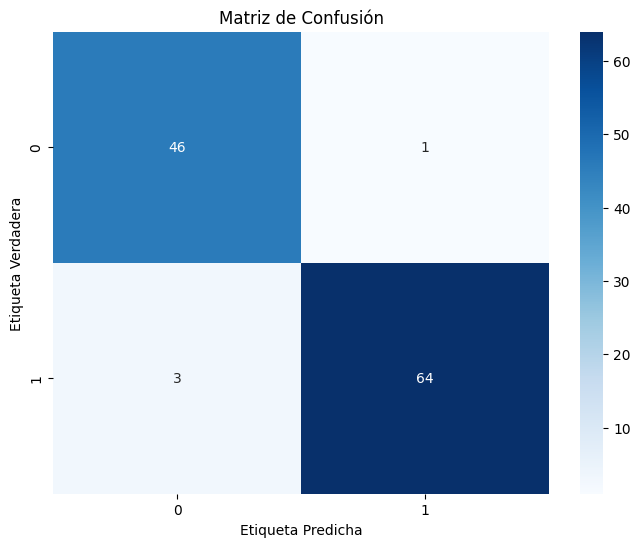

In [53]:
# Gráfica para matriz de confusión
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

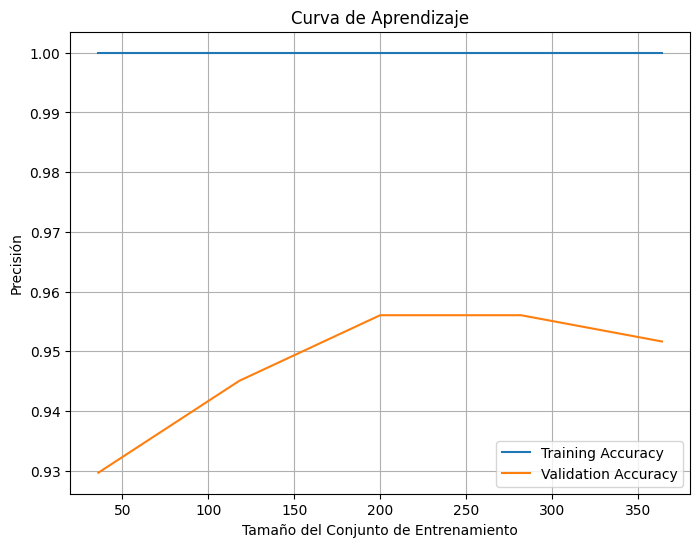

In [54]:
# Gráfica de curva de aprendizaje (learning curve)
from sklearn.model_selection import learning_curve

# Curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Promedio de resultados
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='best')
plt.grid()
plt.show()

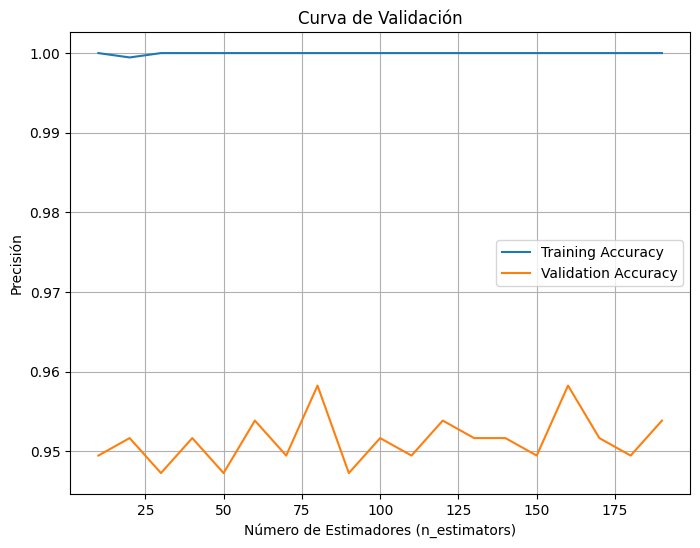

In [55]:
# Gráfica de curva de validación
from sklearn.model_selection import validation_curve
param_range = np.arange(10, 200, 10)
train_scores, test_scores = validation_curve(best_rf, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)

# Promedio de resultados
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores_mean, label='Training Accuracy')
plt.plot(param_range, test_scores_mean, label='Validation Accuracy')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Precisión')
plt.title('Curva de Validación')
plt.legend(loc='best')
plt.grid()
plt.show()